In [1]:
from standardInclude import *
from fit_util import *
from omega_a_fitting import *
from pileup_correction import *
from lost_muon_calculation import *

Welcome to JupyROOT 6.12/06
For interactive plots, run: setint()
To return to non-interactive plots (default state), run: noint()


### Notebook to load and compare fits that were saved to disk

In the doFitting notebook we do the hard work of actually fitting. Here we just sit back and analyze the results

---

In [2]:
with open('param_dict.txt','r') as inf:
    anal_dict = eval(inf.read())
print(anal_dict)
    
analyses = anal_dict['analyses']
requiredParams = anal_dict['requiredParams']
colors = anal_dict['colors']
startTime = anal_dict['startTime']
endTime = anal_dict['endTime']

names = [x[0] for x in analyses]
print(names)

{'requiredParams': 9, 'colors': [1, 2, 3, 4, 6, 7, 9], 'startTime': 30.19, 'endTime': 650.07445, 'energyThreshold': 1710.0, 'analyses': [['Aaron', './data/aaron/UW60HourHists.root', 'THist', 1, './data/aaron/UW60HourHists.root', 'THist', 1, 30.198, 650.0], ['Nick', './data/nick/Kinnaird_histsForJosh.root', 'compareHist', 0.001, './data/nick/Kinnaird_histsForJosh.root', 'defaultHist', 0.001, 30.2, 650.0], ['David', './data/david/histograms1_60h.root', '60h_t_time1_b2', 1, './data/david/histograms1_60h.root', '60h_t_time1_b1', 1, 30.2876, 650.0644], ['Bingzhi', './data/bingzhi/60h_to_josh.root', 'wiggle1700/wiggle_th1700_Josh', 1, './data/bingzhi/60h_to_josh.root', 'wiggle1700/wiggle_th1700', 1, 30.3622, 650.0], ['Bingzhi_NoADT', './data/bingzhi/60h_to_josh_new.root', 'wiggle1700/wiggle_th1700_Josh_no5nsADT', 1, './data/bingzhi/60h_to_josh.root', 'wiggle1700/wiggle_th1700', 1, 30.3622, 650.0]]}
['Aaron', 'Nick', 'David', 'Bingzhi', 'Bingzhi_NoADT']


In [23]:
fitterFiles = [
    './data/aaron/5par_fitter.root_2020_01_24_20_02_23.root',
    './data/nick/5par_fitter_2020_01_24_20_10_10.root',
    './data/david/5par_fitter_2020_01_27_10_47_22.root',
    #'./data/bingzhi/5par_fitter_2020_01_27_17_22_07.root',
    './data/matteo/5par_fitter_2020_01_27_17_32_38.root',
    './data/bingzhi/5par_fitter_2020_02_03_15_14_27.root',

]

fitters = [ r.TFile(x) for x in fitterFiles ]
print(fitters)

[<ROOT.TFile object ("./data/aaron/5par_fitter.root_2020_01_24_20_02_23.root") at 0x7fffcfdf6c50>, <ROOT.TFile object ("./data/nick/5par_fitter_2020_01_24_20_10_10.root") at 0x7fffcfe28f10>, <ROOT.TFile object ("./data/david/5par_fitter_2020_01_27_10_47_22.root") at 0x7fffcfe20b50>, <ROOT.TFile object ("./data/matteo/5par_fitter_2020_01_27_17_32_38.root") at 0x7fffd03b9eb0>, <ROOT.TFile object ("./data/bingzhi/5par_fitter_2020_02_03_15_14_27.root") at 0x7fffd03981c0>]


In [24]:
fitters[0].ls()

TFile**		./data/aaron/5par_fitter.root_2020_01_24_20_02_23.root	
 TFile*		./data/aaron/5par_fitter.root_2020_01_24_20_02_23.root	
  KEY: TH1D	5par;1	Wiggle Plot for [1710.0 < E (MeV) < 6000.0] in Calo 0
  KEY: TTree	t;4	Variable Tree
  KEY: TTree	t;3	Variable Tree
  KEY: TTree	t;2	Variable Tree
  KEY: TTree	t;1	Variable Tree
  KEY: TF1	5par_fitter;1	five_parameter_fit
  KEY: TNamed	name;1	5par_fitter
  KEY: TNamed	fitOptions;1	REMB
  KEY: TPaveText	TPave;1	PaveText. A Pave with several lines of text.
  KEY: TH1D	h_resid_5par_fitter;1	Residuals
  KEY: TH1D	out_MAG P;1	FFT of Residuals of 5par_fitter in range 30.19 < t < 650.07445


---

### First lets read in and compare the fit parameters

In [25]:
npar = 5
fitname = "5par_fitter"

fitPars = []
fitErrs = []
chiSqs = []
for fi in fitters:
    #fi.ls()
    fiti = fi.Get(fitname)
    parsi = [fiti.GetParameter(i) for i in range(npar) ]
    errsi = [fiti.GetParError(i) for i in range(npar)]
    parnames = [fiti.GetParName(i) for i in range(npar)]
    chisqi = [fiti.GetChisquare(), fiti.GetNDF()]
    fitPars.append(parsi)
    fitErrs.append(errsi)
    chiSqs.append(chisqi)
print(fitPars)

[[3472630.7260851404, 64.3035195226615, 0.36960586687227365, -55.760509271239414, -1.0502102809763159], [3478112.6524865422, 64.27572553785993, 0.3691929806181415, -55.73120600263959, -1.0502253665532595], [3426563.20812519, 64.33302032506768, 0.3707674284589469, -55.119889360435074, -1.050654772417592], [3428799.6012854553, 64.25320787126961, 0.37159733049842697, -55.43637226147758, -1.0503102597726943], [3453429.525439772, 64.27579927244359, 0.36920107772958227, -55.67673440753861, -1.05023756953525]]


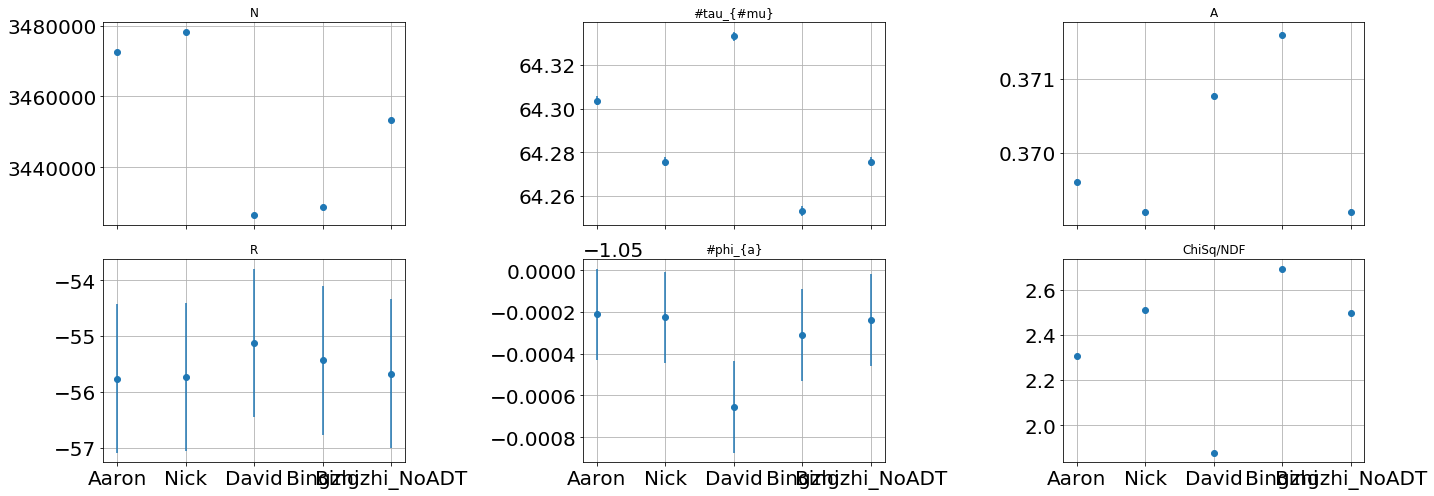

In [26]:
parsByAnal = [x for x in zip(*fitPars)]
errsByAnal = [x for x in zip(*fitErrs)]

parsByAnal.append([x/y for (x,y) in chiSqs])
errsByAnal.append([0 for (x,y) in chiSqs])
parnames.append("ChiSq/NDF")

fig,axs = plt.subplots(2, int(npar/1.4), figsize=(20,7), sharex=True)
ax = flatten2dArray(axs)
for i, pari in enumerate(parsByAnal):
    ax[i].errorbar([x for x in range(len(names))], pari, yerr=errsByAnal[i], fmt="o")
    ax[i].grid()
    ax[i].set_title(parnames[i])
    
plt.xticks([i for i in range(len(names))], names)

plt.tight_layout()
plt.show()

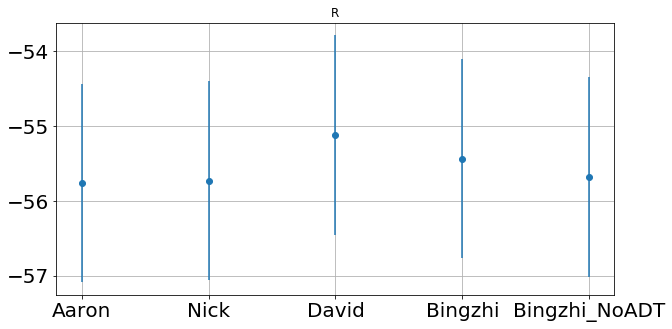

In [27]:
fig,ax  = plt.subplots(figsize=(10,5))
i = 3
plt.errorbar([x for x in range(len(names))], parsByAnal[i], yerr=errsByAnal[i], fmt="o")
plt.xticks([x for x in range(len(names))], names)
plt.title(parnames[i])
plt.grid()
plt.show()

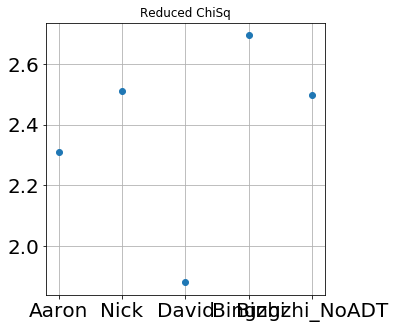

In [28]:
fig,ax  = plt.subplots(figsize=(5,5))
plt.plot( [x/y for (x,y) in chiSqs], "o" )
plt.xticks([i for i in range(len(names))], names)
plt.title("Reduced ChiSq")
plt.grid()
plt.show()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


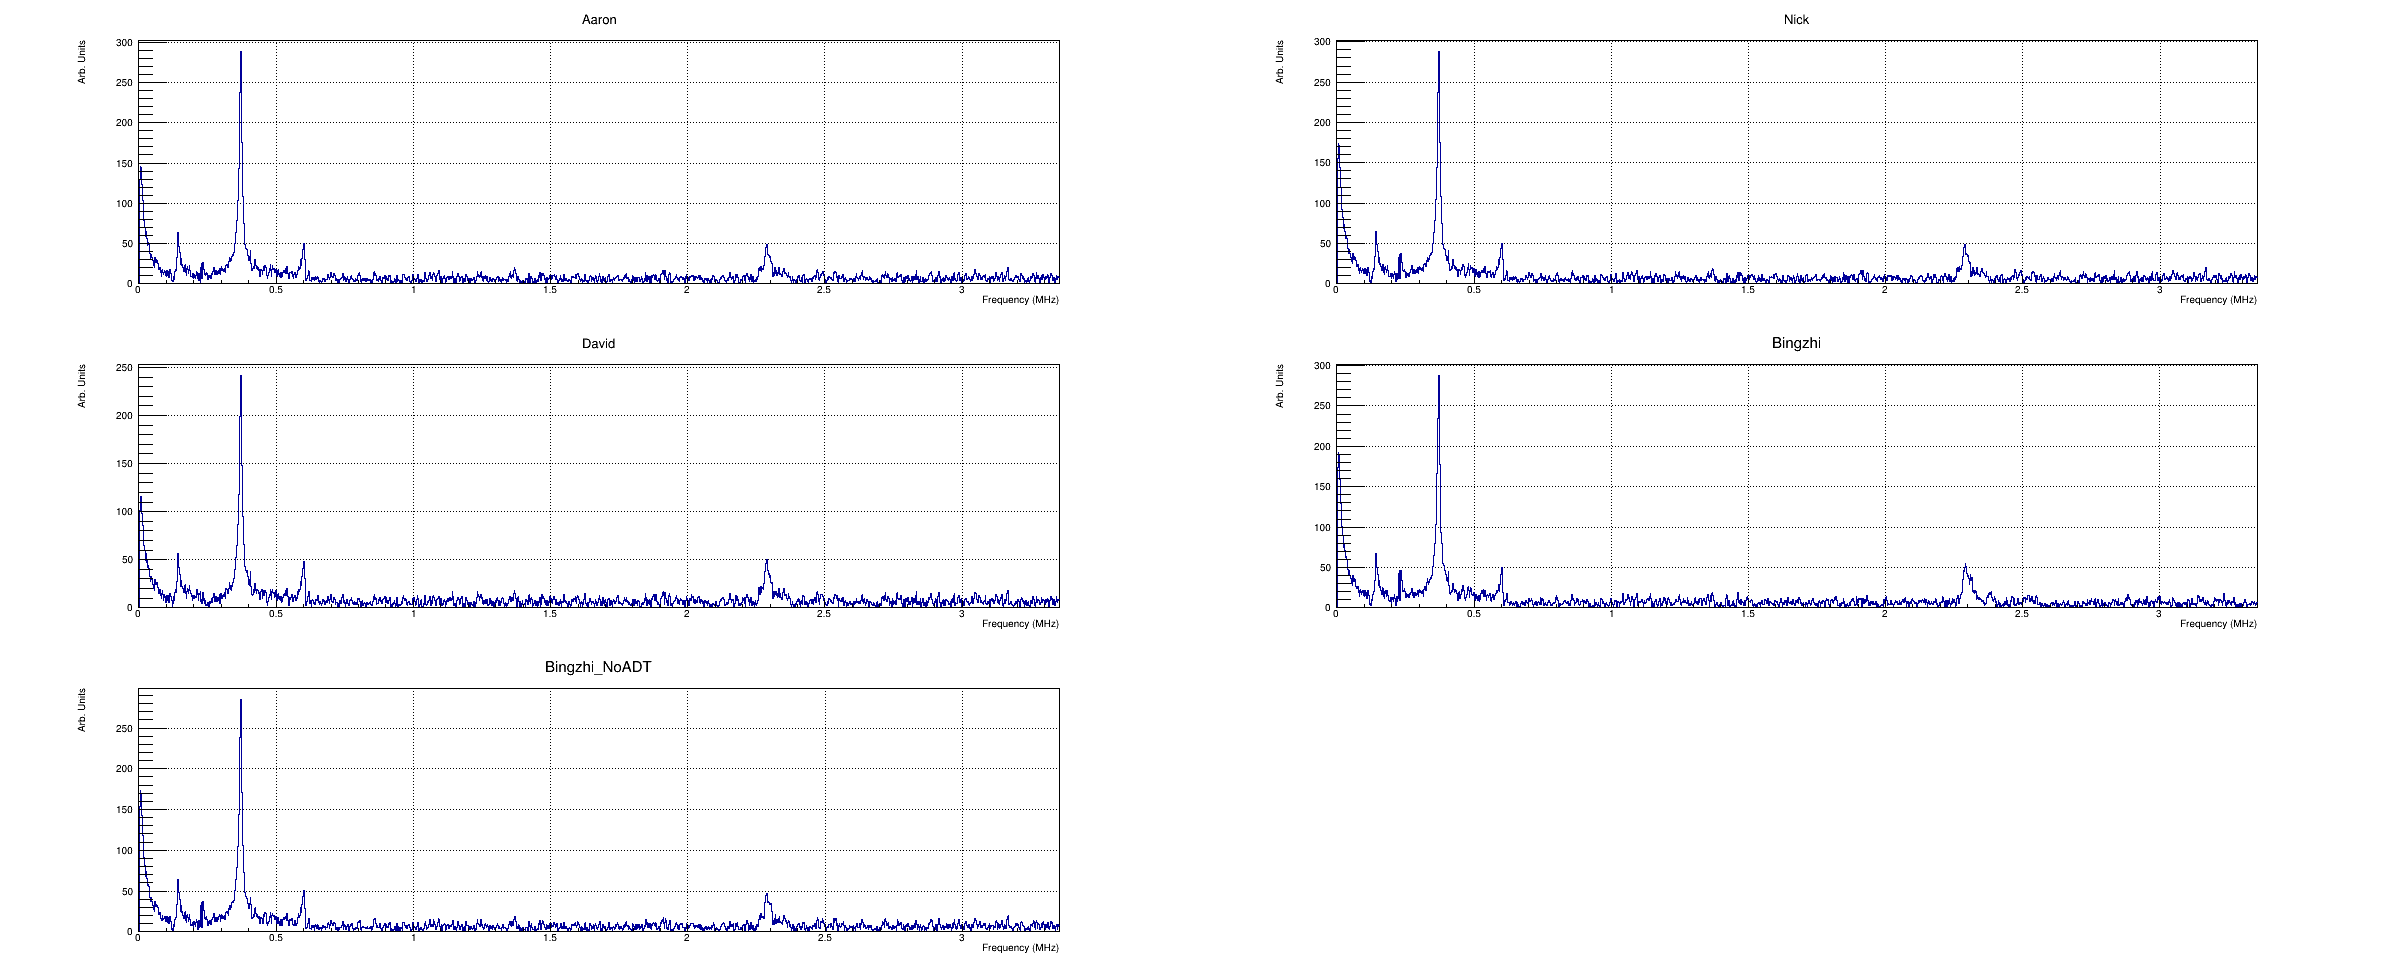

In [29]:
c = r.TCanvas("c","c",2400,1000)
c.Divide(2,int(len(fitters)/2)+1)
for i in range(len(fitters)):
    c.cd(i+1)
    fitters[i].Get("out_MAG P").SetTitle(names[i])
    fitters[i].Get("out_MAG P").Draw("HIST")
    r.gPad.SetGrid()
c.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


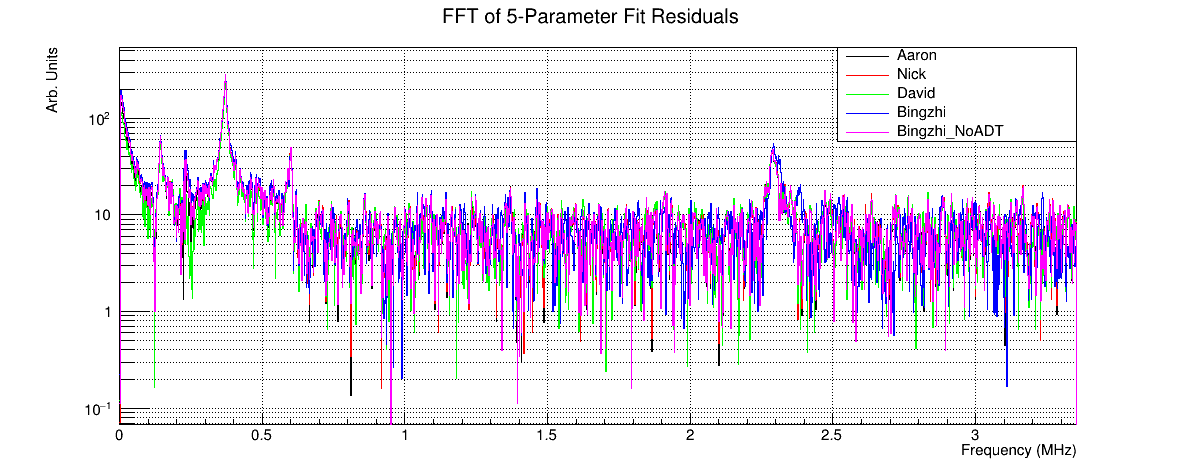

In [30]:
c = r.TCanvas("c","c",1200,500)
leg = r.TLegend(0.7,0.7,0.9,0.9)
for i in range(len(fitters)):
    fitters[i].Get("out_MAG P").SetLineColor(colors[i])
    fitters[i].Get("out_MAG P").SetTitle("FFT of 5-Parameter Fit Residuals")
    if(i > 0):
        fitters[i].Get("out_MAG P").DrawCopy("HIST SAME")
    else:
        fitters[i].Get("out_MAG P").DrawCopy("HIST")
    leg.AddEntry(fitters[i].Get("out_MAG P"), names[i], "l")
    r.gPad.SetGrid()
leg.Draw("SAME")
c.SetLogy()
c.Draw()

---

### Compare to the values from the 60h unblinding

In [31]:
valuesFromKim = [
    'Analysis 2019 - 1a, R: -48.18, dR: 1.34',
    'Analysis 2019 - 1b, R: -47.88, dR: 1.22',
    'Analysis 2019 - 2a, R: -48.47, dR: 1.33',
    'Analysis 2019 - 2b, R: -48.45, dR: 1.22',
    'Analysis 2019 - 3a, R: -48.69, dR: 1.30',
    'Analysis 2019 - 3b, R: -48.84, dR: 1.33',
    'Analysis 2019 - 4a, R: -48.60, dR: 1.34',
    'Analysis 2019 - 4b, R: -49.18, dR: 1.21',
    'Analysis 2019 - 5a, R: -48.80, dR: 1.34',
    'Analysis 2019 - 5b, R: -48.58, dR: 1.20',
    'Analysis 2019 - 6a, R: -49.15, dR: 2.23',
    'Analysis 2020 - 1a, R: -48.09, dR: 1.34',
    'Analysis 2020 - 1b, R: -48.11, dR: 1.21',
    'Analysis 2020 - 2a, R: -48.50, dR: 1.33',
    'Analysis 2020 - 2b, R: -48.52, dR: 1.22',
    'Analysis 2020 - 3a, R: -48.70, dR: 1.36',
    'Analysis 2020 - 3b, R: -48.93, dR: 1.36',
    'Analysis 2020 - 4a, R: -48.57, dR: 1.33',
    'Analysis 2020 - 4b, R: -48.53, dR: 1.21',
    'Analysis 2020 - 5a, R: -48.45, dR: 1.33',
    'Analysis 2020 - 6a, R: -49.21, dR: 2.06'
]

In [32]:
rValuesUnblinding = []
for x in valuesFromKim:
    if('2020' in x):
        rValuesUnblinding.append([x.split(" ")[3].split(",")[0], float(x.split(" ")[5].split(",")[0]), float(x.split(" ")[7])])
print(rValuesUnblinding)
for i,x in enumerate(rValuesUnblinding):
    print(i, x)

[['1a', -48.09, 1.34], ['1b', -48.11, 1.21], ['2a', -48.5, 1.33], ['2b', -48.52, 1.22], ['3a', -48.7, 1.36], ['3b', -48.93, 1.36], ['4a', -48.57, 1.33], ['4b', -48.53, 1.21], ['5a', -48.45, 1.33], ['6a', -49.21, 2.06]]
0 ['1a', -48.09, 1.34]
1 ['1b', -48.11, 1.21]
2 ['2a', -48.5, 1.33]
3 ['2b', -48.52, 1.22]
4 ['3a', -48.7, 1.36]
5 ['3b', -48.93, 1.36]
6 ['4a', -48.57, 1.33]
7 ['4b', -48.53, 1.21]
8 ['5a', -48.45, 1.33]
9 ['6a', -49.21, 2.06]


In [33]:
matching = [ # [my_analysis_number, kims_analysis_number]
    [0, 2],
    [1, 4],
    [2, 0],
    [3, 6],
    [4, 8],
]

In [34]:
kimVals = [ rValuesUnblinding[x[1]][1] for x in matching]
kimErrs = [ rValuesUnblinding[x[1]][2] for x in matching]
print(kimVals,kimErrs)

myVals = parsByAnal[3]
myErrs = errsByAnal[3]

[-48.5, -48.7, -48.09, -48.57, -48.45] [1.33, 1.36, 1.34, 1.33, 1.33]


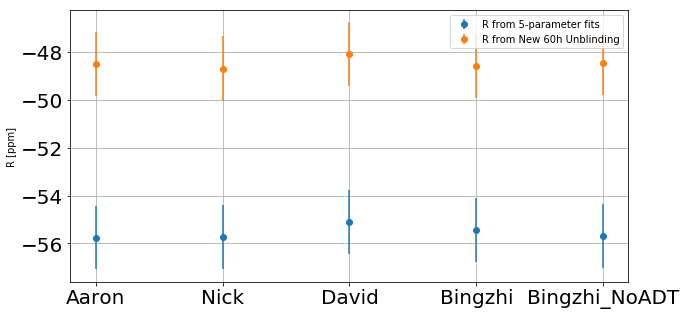

In [35]:
fig, ax = plt.subplots(figsize=(10,5))

plt.errorbar([i for i in range(len(myVals))], myVals, yerr=myErrs, fmt="o", label="R from 5-parameter fits")
plt.errorbar([i for i in range(len(kimVals))], kimVals, yerr=kimErrs, fmt="o", label="R from New 60h Unblinding")
plt.legend()
plt.ylabel("R [ppm]")
plt.xticks([x for x in range(len(names))], names)
plt.grid()

plt.show()

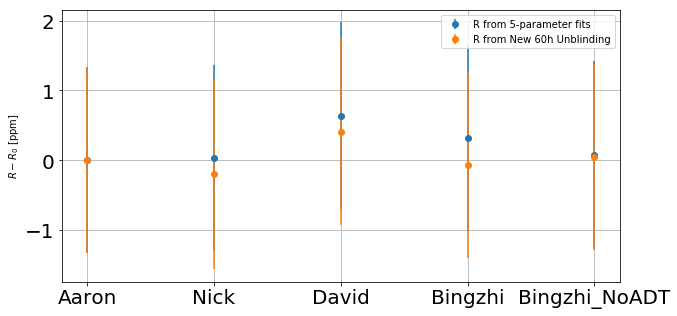

In [36]:
fig, ax = plt.subplots(figsize=(10,5))

plt.errorbar([i for i in range(len(myVals))], [x - myVals[0] for x in myVals], yerr=myErrs, fmt="o", label="R from 5-parameter fits")
plt.errorbar([i for i in range(len(kimVals))], [x - kimVals[0] for x in kimVals], yerr=kimErrs, fmt="o", label="R from New 60h Unblinding")
plt.legend()
plt.ylabel(r"$R - R_{0}$ [ppm]")
plt.xticks([x for x in range(len(names))], names)
plt.grid()

plt.show()

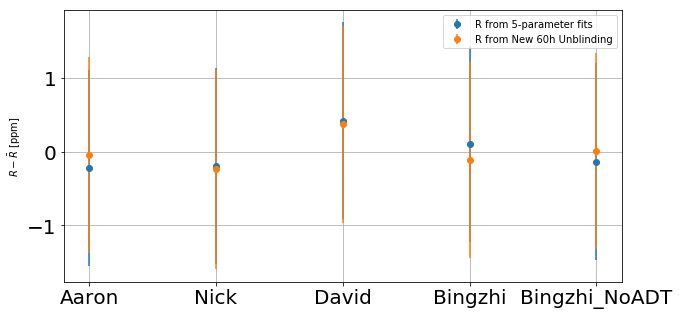

In [37]:
fig, ax = plt.subplots(figsize=(10,5))

plt.errorbar([i for i in range(len(myVals))], [x - np.mean(myVals) for x in myVals], yerr=myErrs, fmt="o", label="R from 5-parameter fits")
plt.errorbar([i for i in range(len(kimVals))], [x - np.mean(kimVals) for x in kimVals], yerr=kimErrs, fmt="o", label="R from New 60h Unblinding")
plt.legend()
plt.ylabel(r"$R - \bar{R}$ [ppm]")
plt.xticks([x for x in range(len(names))], names)
plt.grid()

plt.show()